# Introduction and Objectives

## Introduction
This notebook aims to explore the sales dataset of a global superstore, identifying patterns, trends, and seasonality in the data. These insights will form the foundation for building a sales forecast model for the next 7 days, which will be addressed in subsequent notebooks for this project.

## Specific Objectives
- Understand the seasonality and trends in sales.
- Analyze temporal variables that may impact sales.
- Prepare the data for future modeling

In [1]:
import pandas as pd
from IPython import display

# Step 1 - Data Cleaning and Preparation - EDA:

In [2]:
df = pd.read_csv('train.csv', decimal=',')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   object 
dtypes: float

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   object 
dtypes: float

In [9]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

In [10]:
df['Postal Code'] = df['Postal Code'].astype(str)

In [11]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [12]:
df[(df['City'] == 'Burlington') & (df['State'] == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,nan,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,nan,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,nan,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,nan,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,nan,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,nan,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,nan,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,nan,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,nan,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,nan,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [13]:
df.loc[(df['City'] == 'Burlington') & (df['State'] == 'Vermont') & (df['Postal Code'].isnull()), 'Postal Code'] = '05401'

In [14]:
df['Postal Code'].head(5)

0    42420.0
1    42420.0
2    90036.0
3    33311.0
4    33311.0
Name: Postal Code, dtype: object

In [15]:
df['Postal Code'] = df['Postal Code'].apply(lambda x: x[:-2] if x.endswith('.0') else x)

In [16]:
print(df['Postal Code'].unique())

['42420' '90036' '33311' '90032' '28027' '98103' '76106' '53711' '84084'
 '94109' '68025' '19140' '84057' '90049' '77095' '75080' '77041' '60540'
 '32935' '55122' '48185' '19901' '47150' '10024' '12180' '90004' '60610'
 '85234' '22153' '10009' '49201' '38109' '77070' '35601' '94122' '27707'
 '60623' '29203' '55901' '55407' '97206' '55106' '80013' '28205' '60462'
 '10035' '50322' '43229' '37620' '19805' '61701' '85023' '95661' '64055'
 '91104' '43055' '53132' '85254' '95123' '98105' '98115' '73034' '90045'
 '19134' '88220' '78207' '77036' '62521' '71203' '6824' '75051' '92374'
 '45011' '7090' '19120' '44312' '80219' '75220' '37064' '90604' '48601'
 '44256' '43017' '48227' '38401' '33614' '95051' '55044' '92037' '77506'
 '94513' '27514' '7960' '45231' '94110' '90301' '33319' '80906' '7109'
 '48180' '8701' '22204' '80004' '7601' '33710' '19143' '90805' '92345'
 '37130' '84041' '78745' '1852' '31907' '6040' '78550' '85705' '62301'
 '2038' '33024' '98198' '61604' '89115' '2886' '33180' '284

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

df['Order Date'] = df['Order Date'].values.astype('datetime64[D]')
df['Ship Date'] = df['Ship Date'].values.astype('datetime64[D]')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   Row ID         9800 non-null   int64        
 1   Order ID       9800 non-null   object       
 2   Order Date     9800 non-null   datetime64[s]
 3   Ship Date      9800 non-null   datetime64[s]
 4   Ship Mode      9800 non-null   object       
 5   Customer ID    9800 non-null   object       
 6   Customer Name  9800 non-null   object       
 7   Segment        9800 non-null   object       
 8   Country        9800 non-null   object       
 9   City           9800 non-null   object       
 10  State          9800 non-null   object       
 11  Postal Code    9800 non-null   object       
 12  Region         9800 non-null   object       
 13  Product ID     9800 non-null   object       
 14  Category       9800 non-null   object       
 15  Sub-Category   9800 non-null   object 

In [19]:
df.describe()

,Row ID,Order Date,Ship Date,Sales
count,9800.000000,9800,9800,9800.000000
mean,4900.500000,2017-05-01 05:13:51,2017-05-05 04:17:52,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000
std,2829.160653,NaN,NaN,626.651875


In [20]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,4,793,793,3,1,529,49,627,4,1861,3,17,1849
top,CA-2018-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,10035,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5859,35,35,5101,9800,891,1946,253,3140,19,5909,1492,47


In [21]:
df['Order ID'].value_counts().sort_values(ascending=False)

Order ID
CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
CA-2018-141782     1
US-2017-142685     1
CA-2018-107727     1
US-2018-109484     1
CA-2016-142202     1
Name: count, Length: 4922, dtype: int64

In [22]:
df[df['Order ID'] == 'CA-2017-105732']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7379,7380,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104,Central,OFF-ST-10000419,Office Supplies,Storage,"Rogers Jumbo File, Granite",40.74
7380,7381,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104,Central,OFF-LA-10004559,Office Supplies,Labels,Avery 49,14.40
7381,7382,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104,Central,TEC-PH-10001644,Technology,Phones,"BlueLounge Milo Smartphone Stand, White/Metallic",149.95
7382,7383,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104,Central,OFF-SU-10004782,Office Supplies,Supplies,"Elite 5"" Scissors",16.90
7383,7384,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104,Central,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,17.61
7384,7385,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104,Central,OFF-AP-10001394,Office Supplies,Appliances,Harmony Air Purifier,378.00
7385,7386,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104,Central,OFF-PA-10001838,Office Supplies,Paper,Adams Telephone Message Book W/Dividers/Space ...,17.64
7386,7387,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104,Central,OFF-ST-10004340,Office Supplies,Storage,"Fellowes Mobile File Cart, Black",373.08
7387,7388,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",1336.44
7388,7389,CA-2017-105732,2017-09-13,2017-09-18,Standard Class,AG-10270,Alejandro Grove,Consumer,United States,Omaha,Nebraska,68104,Central,TEC-PH-10004897,Technology,Phones,Mediabridge Sport Armband iPhone 5s,29.97


In [23]:
order_sales = df.groupby('Order ID')['Sales'].sum()

In [24]:
order_sales.sort_values(ascending=False)

Order ID
CA-2015-145317    23661.228
CA-2017-118689    18336.740
CA-2018-140151    14052.480
CA-2018-127180    13716.458
CA-2015-139892    10539.896
                    ...    
US-2018-100209        1.080
US-2015-152723        0.876
CA-2015-112403        0.852
CA-2017-168361        0.836
CA-2018-124114        0.556
Name: Sales, Length: 4922, dtype: float64

In [25]:
df['Ship Mode'] = df['Ship Mode'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Country'] = df['Country'].astype('category')
df['State'] = df['State'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Sub-Category'] = df['Sub-Category'].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   Row ID         9800 non-null   int64        
 1   Order ID       9800 non-null   object       
 2   Order Date     9800 non-null   datetime64[s]
 3   Ship Date      9800 non-null   datetime64[s]
 4   Ship Mode      9800 non-null   category     
 5   Customer ID    9800 non-null   object       
 6   Customer Name  9800 non-null   object       
 7   Segment        9800 non-null   category     
 8   Country        9800 non-null   category     
 9   City           9800 non-null   object       
 10  State          9800 non-null   category     
 11  Postal Code    9800 non-null   object       
 12  Region         9800 non-null   category     
 13  Product ID     9800 non-null   object       
 14  Category       9800 non-null   category     
 15  Sub-Category   9800 non-null   categor

In [27]:
print(df['Ship Mode'].value_counts())

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


In [28]:
print(df['Segment'].value_counts())

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


In [29]:
print(df['Country'].value_counts())

Country
United States    9800
Name: count, dtype: int64


In [30]:
print(df['State'].value_counts())

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
New Jersey               122
Oregon                   122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada  

In [31]:
print(df['Region'].value_counts())

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64


In [32]:
print(df['Category'].value_counts())

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64


In [33]:
print(df['Sub-Category'].value_counts())

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


In [34]:
df['Order Date'].value_counts()

Order Date
2017-09-05    38
2017-11-10    35
2018-12-02    34
2018-12-01    34
2018-09-02    33
              ..
2017-02-25     1
2017-10-25     1
2015-02-21     1
2015-09-11     1
2016-05-09     1
Name: count, Length: 1230, dtype: int64

In [35]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day of Week'] = df['Order Date'].dt.day_name()
df['Week'] = df['Order Date'].dt.isocalendar().week

In [36]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day of Week,Week
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,Wednesday,45
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,Wednesday,45
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,Monday,24
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,Tuesday,41
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,Tuesday,41


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype        
---  ------             --------------  -----        
 0   Row ID             9800 non-null   int64        
 1   Order ID           9800 non-null   object       
 2   Order Date         9800 non-null   datetime64[s]
 3   Ship Date          9800 non-null   datetime64[s]
 4   Ship Mode          9800 non-null   category     
 5   Customer ID        9800 non-null   object       
 6   Customer Name      9800 non-null   object       
 7   Segment            9800 non-null   category     
 8   Country            9800 non-null   category     
 9   City               9800 non-null   object       
 10  State              9800 non-null   category     
 11  Postal Code        9800 non-null   object       
 12  Region             9800 non-null   category     
 13  Product ID         9800 non-null   object       
 14  Category           9800 

# Step 2 - Exploratory Analyses (with charts and tables):

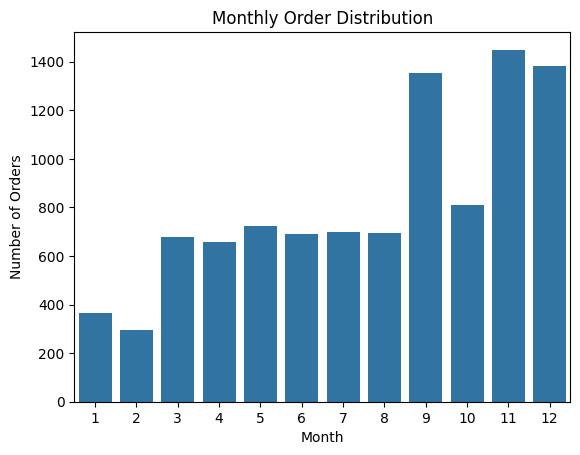

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_orders = df.groupby('Order Month').size()
sns.barplot(x=monthly_orders.index, y=monthly_orders.values)
plt.title('Monthly Order Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

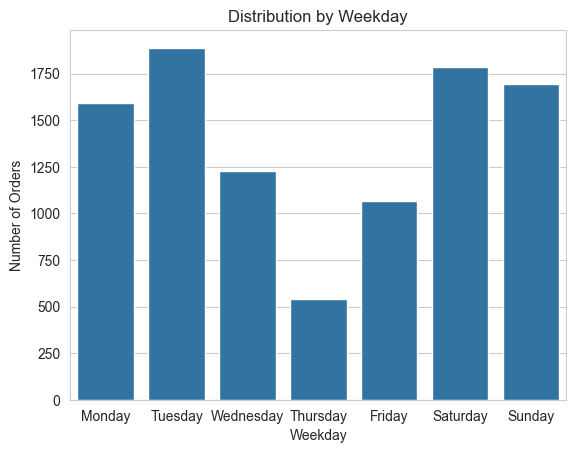

In [52]:
weekly_orders = df.groupby('Order Day of Week').size()
sns.barplot(x=weekly_orders.index, y=weekly_orders.values, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Orders')
plt.show()

In [40]:
full_range = pd.date_range(start=df['Order Date'].min(), end=df['Order Date'].max())

In [53]:
missing_dates = full_range.difference(df['Order Date'])
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex(['2015-01-08', '2015-01-12', '2015-01-17', '2015-01-21',
               '2015-01-22', '2015-01-24', '2015-01-25', '2015-01-29',
               '2015-02-05', '2015-02-09',
               ...
               '2018-08-02', '2018-08-08', '2018-08-09', '2018-08-30',
               '2018-09-06', '2018-09-27', '2018-10-11', '2018-10-18',
               '2018-10-25', '2018-12-12'],
              dtype='datetime64[ns]', length=228, freq=None)


In [42]:
missing_days = missing_dates.to_series()
missing_days_counts = missing_days.dt.day_name().value_counts()
print(missing_days_counts)

Thursday     86
Friday       82
Wednesday    19
Monday       13
Saturday     12
Tuesday       9
Sunday        7
Name: count, dtype: int64


In [43]:
df[df['Order Date'].isin(missing_dates)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day of Week,Week


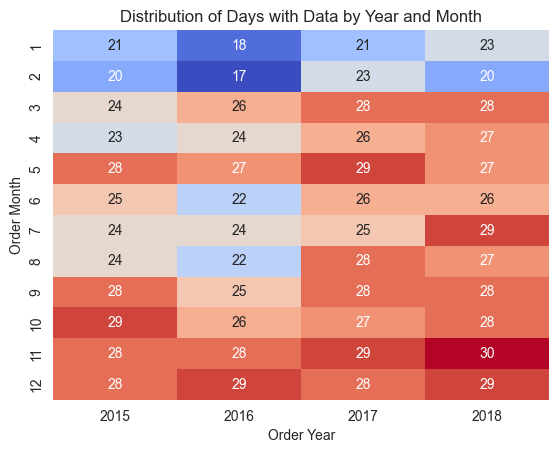

In [54]:
# Creates a DataFrame of complete days with a flag indicating if the day is present
full_data = pd.DataFrame({'Date': pd.date_range(start=full_range.min(), end=full_range.max())})
full_data['Is_Present'] = full_data['Date'].isin(df['Order Date'])

# Adds columns for year and month
full_data['Order Year'] = full_data['Date'].dt.year
full_data['Order Month'] = full_data['Date'].dt.month

# Pivots the data to create a heatmap format
heatmap_data = full_data.pivot_table(index='Order Month', columns='Order Year', values='Is_Present', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=False)
plt.title('Distribution of Days with Data by Year and Month')
plt.show()

In [55]:
# Filters the DataFrame for November and December and creates an explicit copy
df_nov_dez = df[df['Order Month'].isin([11, 12])].copy()

# Uses .loc to ensure modification of the original DataFrame
df_nov_dez.loc[:, 'Day'] = df_nov_dez['Order Date'].dt.day

# Counts the number of records per day in November and December
nov_dez_distribution = df_nov_dez.groupby(['Order Month', 'Day']).size().unstack(fill_value=0)
print(nov_dez_distribution)

Day          1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  \
Order Month                                          ...                       
11           37  47  66  52  53  36  55  32  33  70  ...  33  42  79  42  52   
12           83  65  50  44  60  47  22  64  59  59  ...  44  45  54  58  36   

Day          27  28  29  30  31  
Order Month                      
11           42  49  19  39   0  
12           47  25  40  33  32  

[2 rows x 31 columns]


In [46]:
missing_nov_dez = missing_dates[missing_dates.month.isin([11, 12])]
print(missing_nov_dez)

DatetimeIndex(['2015-11-06', '2015-11-13', '2015-12-11', '2015-12-18',
               '2015-12-25', '2016-11-04', '2016-11-18', '2016-12-02',
               '2016-12-29', '2017-11-02', '2017-12-07', '2017-12-21',
               '2017-12-28', '2018-12-12'],
              dtype='datetime64[ns]', freq=None)


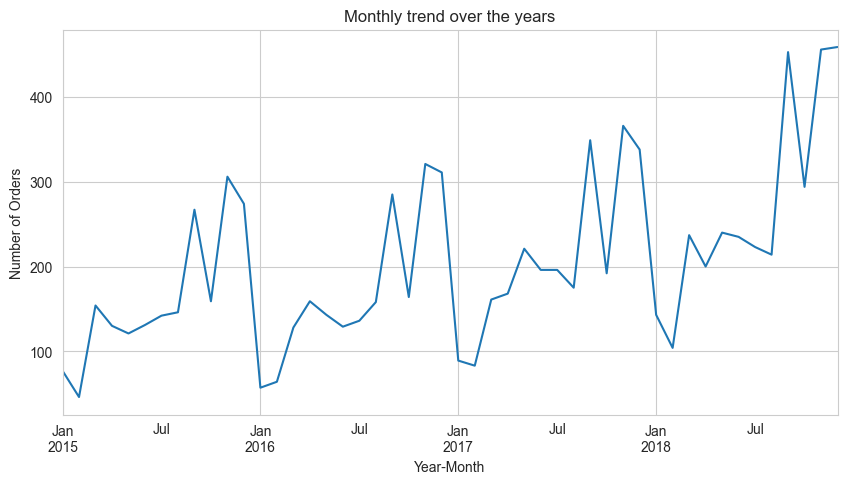

In [56]:
df['Year-Month'] = df['Order Date'].dt.to_period('M')
monthly_trends = df.groupby(['Year-Month']).size()

monthly_trends.plot(kind='line', figsize=(10, 5))
plt.title('Monthly trend over the years')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.show()

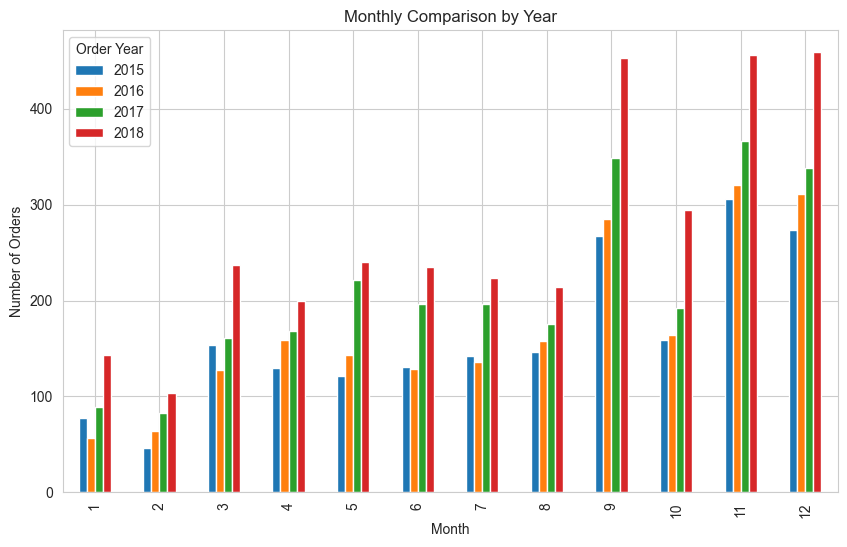

In [57]:
monthly_by_year = df.groupby(['Order Year', 'Order Month']).size().unstack('Order Year')
monthly_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Comparison by Year')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

# Step 3 - Seasonal Insights:

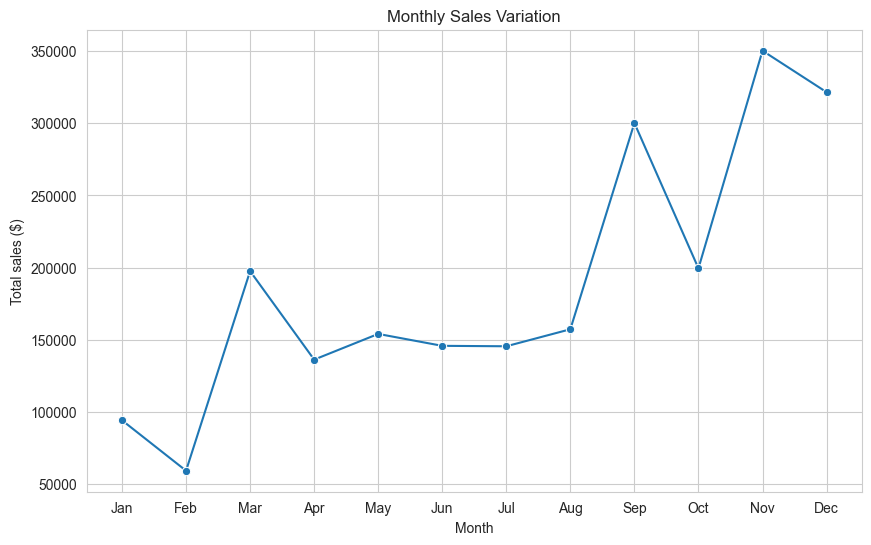

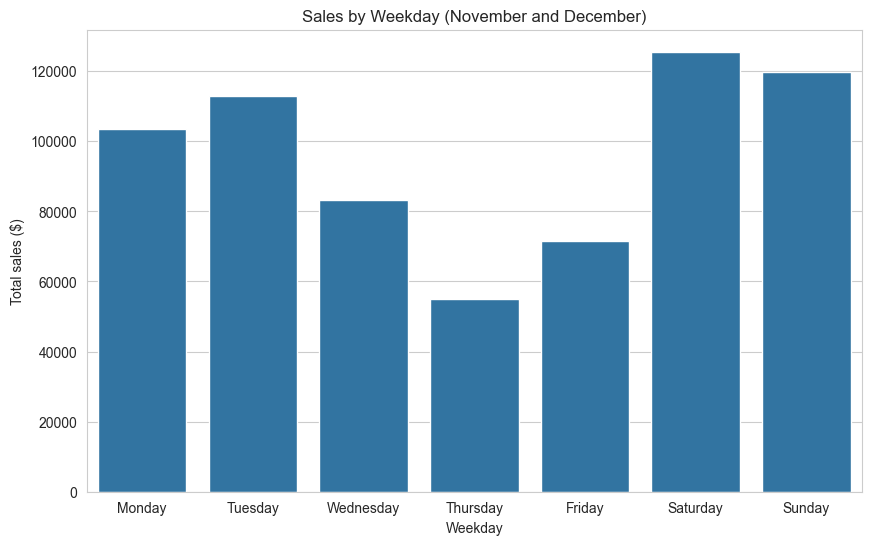

In [58]:
# Sets the style for the charts
sns.set_style('whitegrid')

# Aggregates data by month to identify seasonality
monthly_sales = df.groupby('Order Month')['Sales'].sum()

# Line chart to visualize seasonality
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, marker='o')
plt.title('Monthly Sales Variation')
plt.xlabel('Month')
plt.ylabel('Total sales ($)')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Detailed analysis of November and December, considering the observed increase
sales_nov_dec = df[df['Order Month'].isin([11, 12])].groupby('Order Day of Week')['Sales'].sum()

# Bar chart: sales by weekday for November and December
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_nov_dec.index, y=sales_nov_dec.values, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales by Weekday (November and December)')
plt.xlabel('Weekday')
plt.ylabel('Total sales ($)')
plt.show()

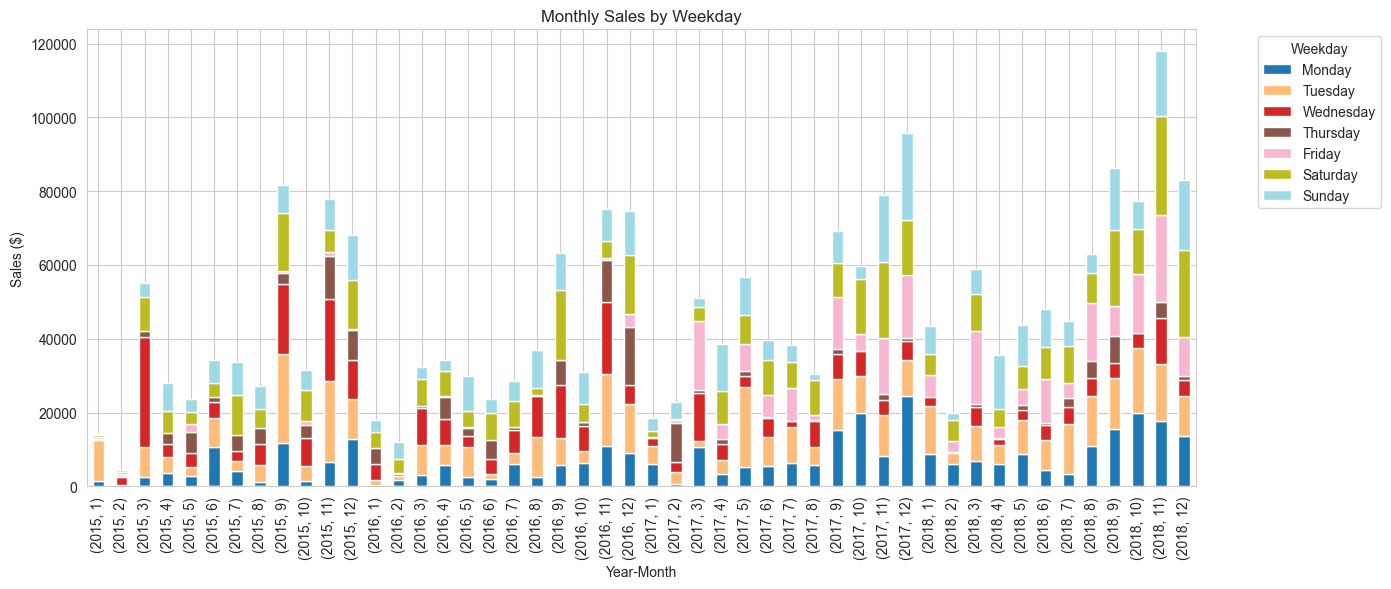

In [59]:
# Total sales by month and weekday
monthly_weekday_sales = df.groupby(['Order Year', 'Order Month', 'Order Day of Week'])['Sales'].sum().unstack()

# Reorders the weekdays for better readability
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthly_weekday_sales = monthly_weekday_sales[weekday_order]

# Stacked bar chart
monthly_weekday_sales.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Monthly Sales by Weekday')
plt.xlabel('Year-Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=90)
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


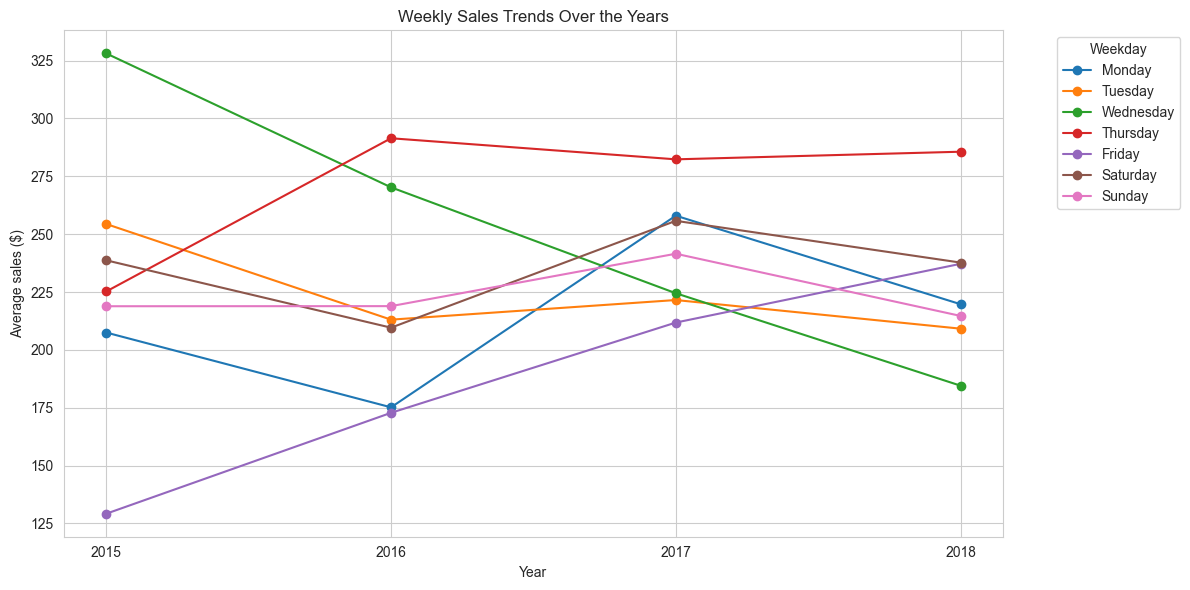

In [60]:
# Average sales by weekday across years
weekly_trends = df.groupby(['Order Year', 'Order Day of Week'])['Sales'].mean().unstack()

# Line chart
weekly_trends = weekly_trends[weekday_order]  # Reordenando os dias
weekly_trends.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Weekly Sales Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average sales ($)')
plt.xticks(range(weekly_trends.index.min(), weekly_trends.index.max() + 1))
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Conclusions  

The exploratory analysis revealed important patterns in sales behavior over time and provided relevant insights about the data structure:  

1. **Seasonal and Temporal Patterns:**  
   - The months of September, November, and December showed an average sales volume approximately twice as high as the other months.  
   - A consistent increase in sales volume was observed in the last months of each year, suggesting possible seasonal influences or specific campaigns.  
   - Sales volumes were highest on Tuesdays, Saturdays, and Sundays, while Thursdays had significantly lower sales, about one-third of the volume on the busiest days.  

2. **Annual Trends:**  
   - There has been a steady increase in the number of orders year over year, indicating a possible expansion of the customer base or effective sales growth strategies.  
   - A detailed analysis of November and December revealed variable sales distribution across days, with peaks on specific dates, which may be relevant for future promotional campaigns.  

3. **Data Quality:**  
   - The dataset contains gaps for 228 dates throughout the analyzed period, with the highest concentration of missing data on Thursdays and Fridays. This factor should be considered in future analyses to avoid bias in the results.  

These initial insights provide a solid foundation for developing more advanced analyses, such as sales forecasting and evaluating the impact of strategic actions over time.  
